## Import the libraries

In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    

In [4]:
data = pd.read_csv("EastWestAirlines.csv");
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Normalize the data

In [6]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
data_norm = pd.DataFrame(MM.fit_transform(data.iloc[:, 1:]))
data_norm.columns = list(data.iloc[:, 1:])

In [7]:
data_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

In [8]:
X = data_norm.values
X   

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

### Getting the best epsilon value

In [9]:
from sklearn.neighbors import NearestNeighbors  

In [10]:
neigh = NearestNeighbors(n_neighbors=22)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

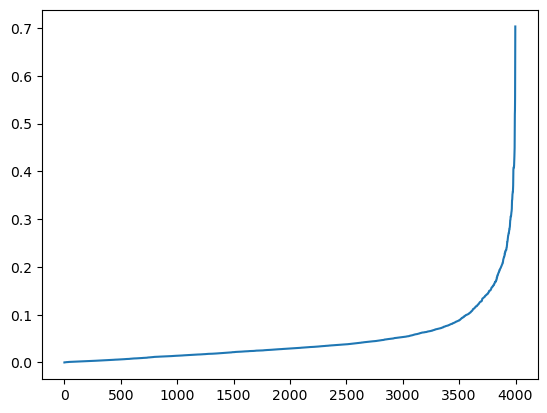

In [11]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The curve shifts around 0.15. So we can take eps value as **0.15**

## Fitting the model

In [12]:
dbscan = DBSCAN(eps=0.15, min_samples=12)
dbscan.fit(X) 

DBSCAN(eps=0.15, min_samples=12)

In [13]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [14]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [15]:
pd.set_option("display.max_rows", None)  

In [17]:
cl

cluster
0           0
1           0
2           0
3           0
4           1
5           0
6           2
7           3
8          -1
9           4
10          5
11          6
12          5
13          0
14          0
15          1
16          1
17          3
18          4
19          4
20          6
21         -1
22         -1
23          0
24          0
25          0
26          0
27          0
28          4
29          3
30          2
31          0
32          7
33          0
34          0
35          1
36          3
37          0
38          4
39          3
40          0
41          1
42         -1
43         -1
44          2
45          3
46          5
47          3
48          4
49          0
50         -1
51          0
52          1
53          3
54          0
55          0
56          7
57          3
58          2
59          4
60          2
61          0
62          0
63          0
64          0
65         -1
66          0
67          7
68          4
69          4
70         -1
71          7
72         -1
73          0
74          2
75          2
76          0
77          7
78          1
79          6
80          3
81          0
82          0
83          0
84          0
85          6
86          3
87         -1
88          5
89          3
90          3
91          0
92          1
93          3
94         -1
95          0
96          0
97          7
98          0
99          4
100         6
101         3
102         0
103         3
104         0
105         6
106        -1
107         3
108         1
109         1
110         2
111         3
112        -1
113         3
114         3
115         2
116         5
117        -1
118         4
119         3
120         0
121        -1
122         1
123         4
124         7
125         1
126        -1
127        -1
128         8
129         1
130         3
131         3
132         3
133         3
134         4
135        -1
136         7
137         1
138         3
139         0
140         0
141         0
142         0
143         7
144         2
145         3
146         0
147         6
148         2
149         0
150         1
151        -1
152        -1
153         0
154         1
155         7
156         2
157         4
158         6
159         0
160         2
161         6
162         3
163         1
164         4
165         0
166         0
167         6
168         1
169         1
170         6
171         0
172         4
173         3
174         7
175        -1
176         3
177        -1
178         3
179         3
180         0
181         4
182         0
183         8
184         2
185         2
186        -1
187         0
188        -1
189         0
190        -1
191        -1
192         6
193        -1
194         3
195         0
196         6
197         2
198        -1
199         1
200         1
201        -1
202         0
203         6
204         0
205         0
206         6
207         3
208         4
209         0
210        -1
211         0
212         0
213         4
214         0
215         7
216         0
217         0
218         4
219         7
220        -1
221         6
222         3
223         0
224         2
225         5
226        -1
227         1
228         5
229         9
230         4
231         6
232         0
233         8
234         8
235         8
236         0
237         3
238        -1
239         0
240        -1
241         8
242         7
243        -1
244        -1
245        -1
246         0
247         3
248         6
249         5
250         0
251         0
252         2
253         4
254         3
255        -1
256        -1
257         8
258         0
259         6
260         0
261         0
262         5
263         5
264         3
265         4
266         0
267         0
268         1
269         6
270         4
271         6
272         6
273         0
274         0
275        -1
276         0
277         4
278         0
279         6
280         0
281         1
282        -1
283         3
284         1
28

In [18]:
data1 = pd.concat([data,cl],axis=1)  

In [19]:
data1

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [20]:
import matplotlib.pyplot as plt
plt.style.use('classic') 

Text(0.5, 1.0, 'Clusters using DBScan')

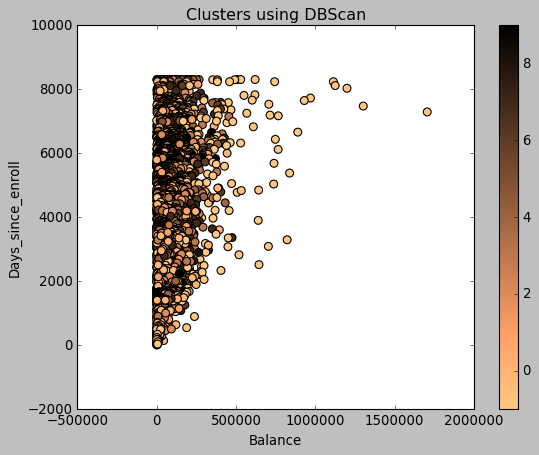

In [24]:
data1.plot(x="Balance",y ="Days_since_enroll",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [25]:
dl = dbscan.labels_

In [26]:
import sklearn
sklearn.metrics.silhouette_score(X, dl) 

0.19154065050195604

## Verifying with KMeans clustering method

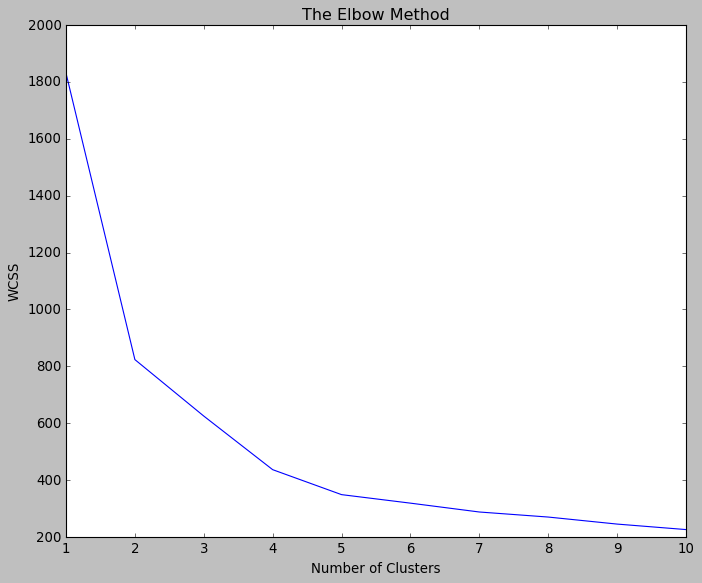

In [27]:
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [28]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(X)  

In [29]:
y_kmeans

array([4, 4, 4, ..., 1, 0, 0])

In [30]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

Kcluster
0            4
1            4
2            4
3            4
4            1
5            4
6            3
7            2
8            1
9            1
10           4
11           1
12           4
13           4
14           4
15           1
16           1
17           2
18           1
19           1
20           1
21           2
22           4
23           4
24           4
25           4
26           4
27           4
28           1
29           2
30           3
31           4
32           3
33           4
34           4
35           1
36           2
37           4
38           1
39           2
40           4
41           1
42           2
43           1
44           3
45           2
46           4
47           2
48           1
49           4
50           4
51           4
52           1
53           2
54           4
55           4
56           3
57           2
58           3
59           1
60           3
61           4
62           4
63           4
64           4
65           1
66           4
67           3
68           1
69           1
70           4
71           3
72           3
73           4
74           3
75           3
76           4
77           3
78           1
79           1
80           2
81           4
82           4
83           4
84           4
85           1
86           2
87           3
88           4
89           2
90           2
91           4
92           1
93           2
94           1
95           4
96           4
97           3
98           4
99           1
100          1
101          2
102          4
103          2
104          4
105          1
106          2
107          2
108          1
109          1
110          3
111          2
112          3
113          2
114          2
115          3
116          4
117          2
118          1
119          2
120          4
121          1
122          1
123          1
124          3
125          1
126          1
127          1
128          2
129          1
130          2
131          2
132          2
133          2
134          1
135          2
136          3
137          1
138          2
139          4
140          4
141          4
142          4
143          3
144          3
145          2
146          4
147          1
148          3
149          4
150          1
151          1
152          3
153          4
154          1
155          3
156          3
157          1
158          1
159          4
160          3
161          1
162          2
163          1
164          1
165          4
166          4
167          1
168          1
169          1
170          1
171          4
172          1
173          2
174          3
175          1
176          2
177          2
178          2
179          2
180          4
181          1
182          4
183          2
184          3
185          3
186          1
187          4
188          3
189          4
190          1
191          1
192          1
193          4
194          2
195          4
196          1
197          3
198          2
199          1
200          1
201          2
202          4
203          1
204          4
205          4
206          1
207          2
208          1
209          4
210          1
211          4
212          4
213          1
214          4
215          3
216          4
217          4
218          1
219          3
220          1
221          1
222          2
223          4
224          3
225          4
226          2
227          1
228          4
229          3
230          1
231          1
232          4
233          2
234          2
235          2
236          4
237          2
238          1
239          4
240          3
241          2
242          3
243          3
244          1
245          1
246          4
247          2
248          1
249          4
250          4
251          4
252          3
253          1
254          2
255          3
256          4
257          2
258          4
259          1
260          4
261          4
262          4
263          4
264          2
265          1
2

In [31]:
data2 = pd.concat([data1,cl1],axis=1) 
data2 

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

Text(0.5, 1.0, 'Clusters using KMeans')

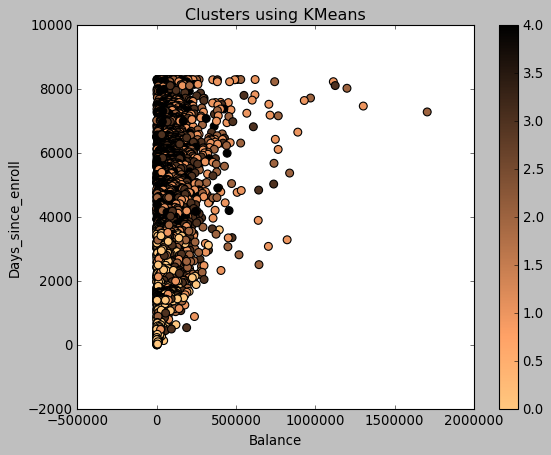

In [32]:
data2.plot(x="Balance",y ="Days_since_enroll",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [33]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.4430672072796034

**KMeans method gave a higher Silhouette score than the DBSCAN method.**